# Integrales dobles
**Integrantes**
- Integrante 1: Hissam Quintero Avilez
- Integrante 2: Arturo Velgis García
- Integrante 3: José Manuel Lira Aguas

## Integración en regiones rectangulares
Si queremos integrar una funcion $f(x,y)$ en una region $R=[a,b]\times[c,d]$ 
![](https://cnx.org/resources/1004b01a48a68e948e28de33b654e16eb84ddd39/CNX_Calc_Figure_15_01_001.jpg)
Se puede usar la aproximacion:
$$\int_a^b\int_c^d f(x,y)dydx\approx \frac{(b-a)(d-c)}{N}\sum_{i=1}^N f(x_i,y_i)$$


donde $x_i, y_i$ son variables aleatorias distribuidas uniformemente en $[a,b],\ y\ [c,d]$ respectivamente
$$x_i\sim\mathcal{U}\left[a,b\right]$$
$$y_i\sim\mathcal{U}\left[c,d\right]$$

## Integración en regiones no rectangulares
Si queremos integrar una función $f(x,y)$ en una region $D$ (como se muestra en la figura)
![fig2](fig2.png)
Se utiliza el siguiente teorema (1):
$$\iint_D f(x,y)dA=\iint_R F(x,y)dA$$ donde $D\subset R=[a,b]\times[c,d]$ y $F$ esta dada por:
$$ F(x,y)= \Bigg \{ \begin{matrix} f(x,y)\ si\ (x,y)\in D \\ 0\ si\ (x,y)\in R\ pero\  (x,y)\notin D \end{matrix} $$
![fig3](fig3.png)
De esta forma, se puede utilizar la misma aproximacion que antes:
$$\iint_D f(x,y)dA=\iint_R F(x,y)dR\approx \frac{(b-a)(d-c)}{N}\sum_{i=1}^N F(x_i,y_i) $$


In [1]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#regiones rectangulares
def int_montecarlo1(funcion, a, b, c, d, N):
    u_x = np.random.uniform(a, b, N)
    u_y = np.random.uniform(c, d, N)
    return (b - a) * (d - c) / N * funcion(u_x, u_y).sum()
    
#regiones no rectangulares

def F(region, funcion,x,y):
    if region(x, y):
        return funcion(x, y)
    else:
        return 0
    
def int_montecarlo2(region, funcion, a, b, c, d, N):
    fsum = 0
    u_x = np.random.uniform(a, b, N)
    u_y = np.random.uniform(c, d, N)
    for i in range (N):
        fsum = fsum + F(region, funcion, u_x[i], u_y[i])
    return (b - a) * (d - c) / N * fsum



### Ejemplos regiones rectangulares
$$I_1=\int_{-1}^1 \int_{-2}^2 \sqrt{1-x^2}dydx$$

$$I_2=\int_{0}^2\int_1^2 x-3y^2 dydx$$


#### Soluciones analiticas:
$$I_1=2\pi$$
$$I_2=-12$$


In [2]:
#funciones
def f1(x, y):
    return (1 - x**2)**.5
def f2(x, y):
    return x - 3 * y**2

#integrales
N = np.logspace(1, 7, 7).astype(int)
tabla = pd.DataFrame(index=N, columns=['I1 aprox:', '%error1:', 'I2 aprox:', '%error2'])
for n in N:
    I_1 = tabla.loc[n, 'I1 aprox:'] = int_montecarlo1(funcion=f1, a=-1, b=1, c=-2, d=2, N=n)
    tabla.loc[n, '%error1:'] = 100 * np.abs(2 * math.pi - I_1) / (2 * math.pi) 
    I_2 = tabla.loc[n, 'I2 aprox:'] = int_montecarlo1(funcion=f2, a=-0, b=2, c=1, d=2, N=n)
    tabla.loc[n, '%error2'] = 100 * np.abs(-12 - I_2) / 12 
tabla

,I1 aprox:,%error1:,I2 aprox:,%error2
10,6.33404,0.809304,-10.9131,9.05759
100,6.51563,3.69939,-11.958,0.34978
1000,6.20072,1.31247,-11.8389,1.34224
10000,6.28731,0.0656515,-12.0419,0.349256
100000,6.28328,0.00144149,-12.003,0.025154
1000000,6.28587,0.0427899,-11.992,0.0664053
10000000,6.28315,0.000570017,-11.9985,0.0123003


### Ejemplos regiones no rectangulares
$$I_3=\iint_D x^2+y^2 dD,\ D={(x,y): 2\leq x\leq y\leq6}$$ 

$$I_4= \iint_D y^2+cos^2(x^2),\ D={(x,y): \frac{x^2}{16}+\frac{y^2}{36}\leq 1} $$

#### Soluciones analiticas
$$I_3=832/3\approx 277$$
$$I_4=230\pi$$

In [3]:
def region1(x, y):
    return 2 < x < y < 6
#esta funcion es solo para graficar la region1, la anterior no se podia graficar
def region1_graf(x, y):
    return np.logical_and(2 < x, np.logical_and(x < y, y < 6))

def f3(x, y):
    return x**2 + y**2

def region2(x, y):
    return x**2 / 16 + y**2 / 36 < 1

def f4(x, y):
    return math.cos(x**2)**2 + y**2

Se grafican las regiones para elegir un rectangulo que las contenga

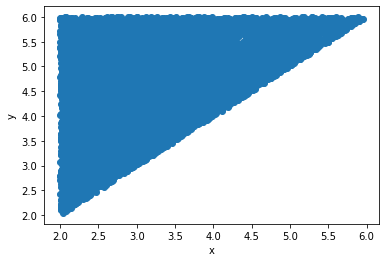

In [21]:
N = 100000
x = np.random.uniform(0, 10, N)
y = np.random.uniform(0, 10, N)

dentro_region1 = region1_graf(x, y)
plt.scatter(x[dentro_region1], y[dentro_region1])

plt.xlabel('x')
plt.ylabel('y');

Para la primer region $R=[2,6]\times[2,6]$

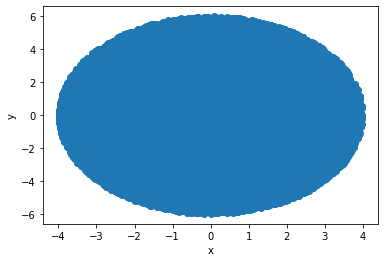

In [22]:
N = 100000
x = np.random.uniform(-10, 10, N)
y = np.random.uniform(-10, 10, N)

dentro_region2 = region2(x, y)
plt.scatter(x[dentro_region2], y[dentro_region2])

plt.xlabel('x')
plt.ylabel('y');

Para esta region $R=[-4,4]\times [-6,6]$

In [23]:
a_1, b_1, c_1, d_1= 2, 6, 2, 6
a_2, b_2, c_2, d_2= -4, 4, -6, 6
N = np.logspace(1, 6, 6).astype(int)
tabla = pd.DataFrame(index=N, columns=['I3 aprox:', '%error3:', 'I4 aprox:', '%error4:'])
for n in N:
    I_3 = tabla.loc[n, 'I3 aprox:'] = int_montecarlo2(region1, f3, a=a_1, b=b_1, c=c_1, d=d_1, N=n)
    tabla.loc[n, '%error3:'] = 100 * np.abs(832 / 3 - I_3) / (832 / 3) 
    I_4 = tabla.loc[n, 'I4 aprox:'] = int_montecarlo2(region2, f4, a=a_2, b=b_2, c=c_2, d=d_2, N=n)
    tabla.loc[n, '%error4:'] = 100 * np.abs(230 * math.pi - I_4) / (230 * math.pi) 
tabla

,I3 aprox:,%error3:,I4 aprox:,%error4:
10,321.309,15.8568,346.734,52.0135
100,296.342,6.85422,717.8,0.659667
1000,274.225,1.12063,706.152,2.27165
10000,282.184,1.74909,722.913,0.047993
100000,278.475,0.41149,724.972,0.332903
1000000,277.687,0.127552,721.426,0.157841


### Referencias
AT Patera and M Yano (2014). Monte Carlo Integration... in a Nutshell. MIT. https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf

(1) Stewart, J. (2012). Cálculo de varias variables: Trascendentes tempranas (7a edición.). México: Cengage Learning. p:988-990